In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/employee'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Extracting the Data for initial Exploration

### import the necesary header files 

In [2]:
#for data manipulation
import pandas as pd 
import numpy as np
from collections import Counter

#for better analysis of 
import seaborn as sns 
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#for model definition and testing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Read the dataset to a variable df => DataFrame

In [3]:
#pandas.read_csv => used to read a csv data file
df = pd.read_csv('/kaggle/input/employees-satisfaction-analysis/Employee Attrition.csv')
#show the first 10 rows of the imported data 
df.head(10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
5,6.0,0.41,0.50,2.0,153.0,3.0,0.0,0.0,sales,low
6,7.0,0.10,0.77,6.0,247.0,4.0,0.0,0.0,sales,low
7,8.0,0.92,0.85,5.0,259.0,5.0,0.0,0.0,sales,low
8,9.0,0.89,1.00,5.0,224.0,5.0,0.0,0.0,sales,low
9,10.0,0.42,0.53,2.0,142.0,3.0,0.0,0.0,sales,low


### df.info() shows the basic information related to the entire dataset. These include number of non-null values, Column names and data type of each column

In [4]:
df.info()
#non required columns - Emp ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


#### **df.describe()** The function is used to describe the statistics of the dataset. It mainly shows the total count, mean, median and mode of each columns in the dataset.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Emp ID,14999.0,7500.000000,4329.982679,1.00,3750.50,7500.00,11249.50,14999.0
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


Here we can see that there are 14,999 employees surveyed as part of this analysis. First let's explore all the columns:

**Emp Id** It is unique for all of them starting from 1 to 14,999. So it is clear that the employee numer does not depend on satisfaction level of an employee.

**Satisfaction Level:** The average satisfaction level of the employees is 0.613 or it can be interpreted as the average satisfaction level of an employee is about 61% with a standard deviation of 0.249. 25% of employees have a satisfaction level below 0.44 and 75% of employees have a satisfaction level below 0.82.

**Number of projects:** On an average an employee gets about 3.8 projects to work on with a std deviation of 1.2. 25% of employees have less than 3 projects and 75% of employees have less than 5 projects. The highest number of projects for an employee is 7 whereas the minimum number of project is 2. The number of project might have a strong dependence on satisfaction level since this reveals the workload distribution among employees.

**Last Evaluation:** It can be interpreted as the performance score of the employees. This statistics helps in determining the productiveness of the employees. On an average the performance score of employees is 0.71. The quartile measures reveals, only 25% of employees have a performance score above 0.82. Half of the employees have a performance score above 0.72 and half of them have performance score below 0.7. The least productive 25% have a performance score of 0.56.

**Time spend in company:** On an average an employee stay for upto 3 years in a company. The maximum an employee spent in a company is for 10 years. More than 75% of employees stay in a company for less than 4 years. At a minimum they stay for 2 years.

Similarly we could see the statistics of other columns also

# Data Cleaning

#### Since the employee id is continuos from 1 to 14,999 and does not add any information to analysis we could make it as the index of the dataset.

In [6]:
newDf = df.set_index('Emp ID')
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15787 entries, 1.0 to 14999.0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.2+ MB


In [7]:
#replace the newDf with df
df = newDf
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15787 entries, 1.0 to 14999.0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.2+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [9]:
#converting the dtype of salary and and dept to category variable
cols_to_be_categorical = ['dept','salary']
for value in cols_to_be_categorical:
    df[value]=df[value].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15787 entries, 1.0 to 14999.0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  float64 
 3   average_montly_hours   14999 non-null  float64 
 4   time_spend_company     14999 non-null  float64 
 5   Work_accident          14999 non-null  float64 
 6   promotion_last_5years  14999 non-null  float64 
 7   dept                   14999 non-null  category
 8   salary                 14999 non-null  category
dtypes: category(2), float64(7)
memory usage: 1018.0 KB


### Dealing with missing values and handling it 

In [11]:
#finding the missing values 
missing_values = df[df.isna().any(axis=1)]
display(missing_values.head())
display(missing_values.isna().count())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

The 788 entries have no data. So we could simply drop those rows. It is done as a part of handling missing values or null values. If null values are not properly handled it can cause errors or false results in model development and testing

In [12]:
#there are 788 entries with missing values. Since all those 788 rows does not have any values we can simply drop thdf.dropna(inplace = True)
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 1.0 to 14999.0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  float64 
 3   average_montly_hours   14999 non-null  float64 
 4   time_spend_company     14999 non-null  float64 
 5   Work_accident          14999 non-null  float64 
 6   promotion_last_5years  14999 non-null  float64 
 7   dept                   14999 non-null  category
 8   salary                 14999 non-null  category
dtypes: category(2), float64(7)
memory usage: 967.2 KB


# Detecting outliers in the data

**An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.**

**A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median.**

**Let there be Q1, Q2 and Q3 be quartile**

***
**IQR = > InterQuartile Range = Q3 - Q1**

**upperFence = Q3 + 1.5xIQR**

**LowerFence =  Q1 - 1.5xIQR**
***

**Anything that falls above the upperFence and anything that falls below the lowerfence are considered as outliers. If necessary we could remove outliers. But in most cases we keep outliers since there are these kind of variation in all real-world data**

In [14]:
#number of outliers in the data
def outliers(data):
    Q1,Q2,Q3 = np.quantile(data, [.25,.5,.75])
    IQR = Q3 - Q1
    UpperFence = Q3 + (1.5*IQR)
    LowerFence = Q1 - (1.5*IQR)
    return data[ (data > UpperFence) | (data < LowerFence)]


_columns = df.select_dtypes(np.number).columns
for _cols in _columns:
    result = outliers(df[_cols].values)
    print(_cols,":",Counter(result))


satisfaction_level : Counter()
last_evaluation : Counter()
number_project : Counter()
average_montly_hours : Counter()
time_spend_company : Counter({6.0: 718, 10.0: 214, 7.0: 188, 8.0: 162})
Work_accident : Counter({1.0: 2169})
promotion_last_5years : Counter({1.0: 319})


In [15]:
#detecting outliers using Box Plot 
fig = make_subplots(
    rows = 1, cols = len(_columns),    
)

for i, _col in enumerate(_columns,start=1):
    y0 = df[_col].values
    fig.append_trace(go.Box(y=y0,name=_col), row = 1,col = i)

fig.update_layout(height=500, width=1200, title_text="Outliers")
fig.show()

## EDA - Exploratory Data Analysis

In [16]:
px.histogram(df['number_project'],nbins = len(df['number_project'].unique()),
            x = 'number_project',
            title = 'Employee_count v/s number of projects',
            )

In [17]:
#Analysis on Categorical Data
categoricalColumns = df.select_dtypes('category').columns

df[categoricalColumns[0]].value_counts()
fig = px.bar(df[categoricalColumns[0]].value_counts(),
             color=df[categoricalColumns[0]].unique(),
             title = "Employees in each department",
            )
fig.show()

fig = px.bar(df[categoricalColumns[1]].value_counts(),
            color = df[categoricalColumns[1]].unique(),
            title = "Employees with salary range")
fig.show()

In [18]:
styles = [dict(selector="caption",
            props=[("text-align", "left"),
                   ("font-size", "150%"),
                   ("color", 'red')])]


newDf = df.drop('dept',axis = 1).copy()
display(newDf.groupby("salary").mean().style.format("{:.3f}").\
    background_gradient(cmap="Reds",axis=0).\
       set_caption("Satisfaction level with the range of salaies").\
        set_table_styles(styles))
print("\n\n")


#since our dependent variable is satisfaction_rate let's
#analysis only the dependency of that variable alone
df.groupby(["salary","dept"])[["satisfaction_level"]].mean().unstack().\
    style.format("{:.3f}").background_gradient(cmap="Blues",axis=0).\
    set_caption("Salary v/s satisfaction rate of each dept").set_table_styles(styles)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
salary,,,,,,,
high,0.637,0.704,3.767,199.867,3.693,0.155,0.058
low,0.601,0.717,3.800,200.997,3.438,0.142,0.009
medium,0.622,0.717,3.814,201.338,3.529,0.145,0.028


In [19]:


#Variation of salary in each dept for each dependencies other than satisfaction_level
for _col in _columns:
    if _col == 'satisfaction_level':
        continue
    display(df.groupby(["salary","dept"])[[_col]].mean().unstack().\
           style.format("{:.3f}").background_gradient(cmap="Blues").\
           set_caption(f"Salary v/s {_col}").set_table_styles(styles))
    print("\n")

## Model Development

### Defining Correlation matrix to find the dependencies of each features on one another

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [20]:
df2 = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].corr()

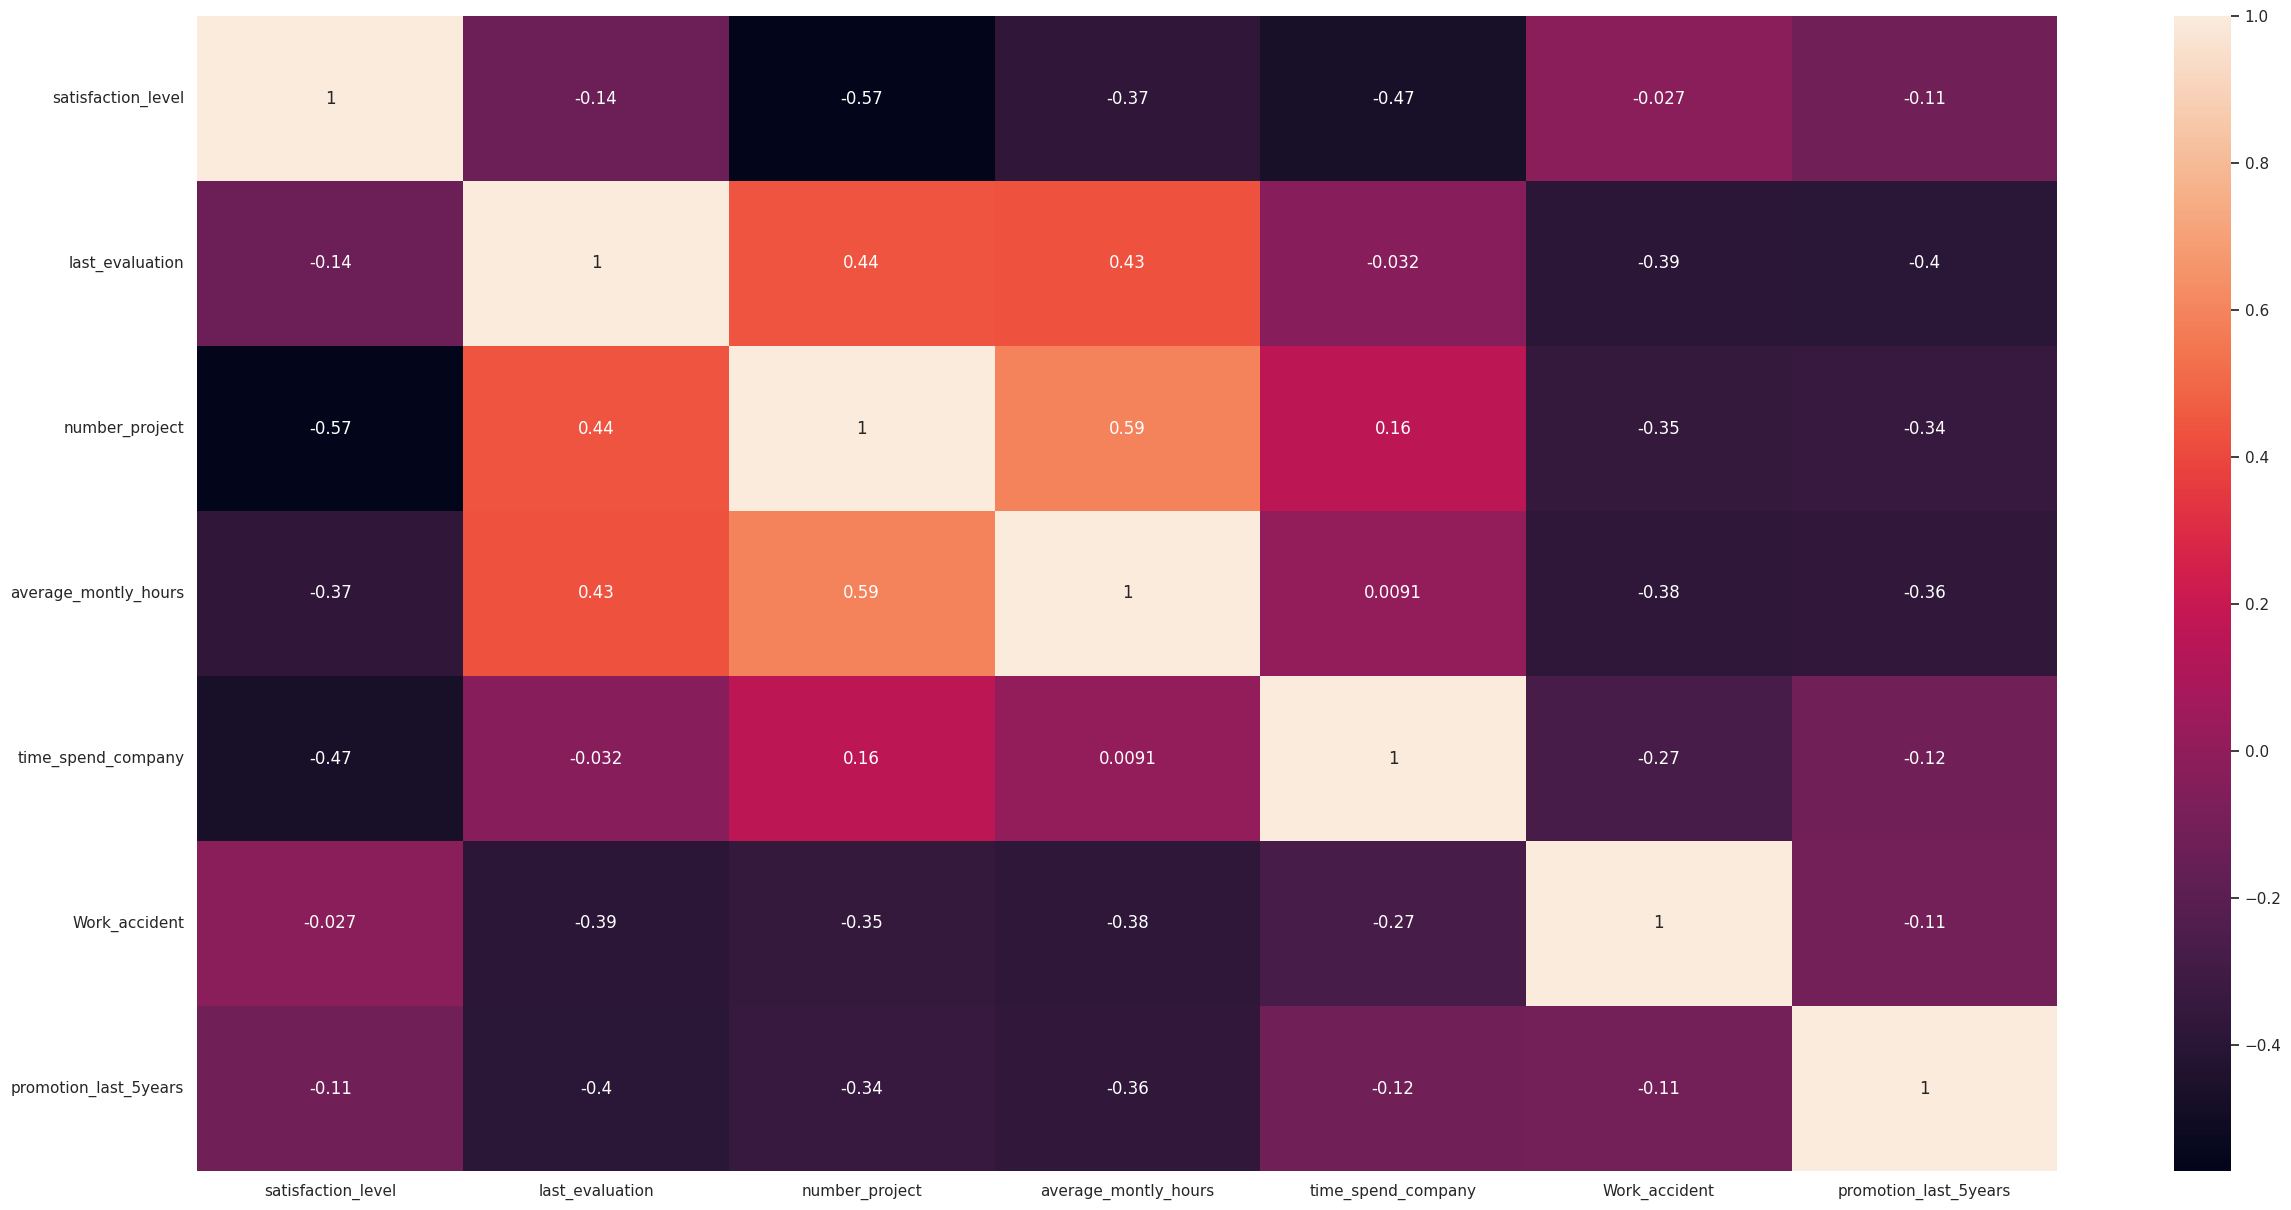

In [21]:
plt.figure(figsize = (30,15))
sns.heatmap(df2.corr(method="pearson"),annot = True)
sns.set(font_scale = 1.5)

### Label encoding for categorical data for Model Development

In [22]:
#label encoding for categorical data
labelEncoder = LabelEncoder()
for value in categoricalColumns:
    df[value] = labelEncoder.fit_transform(df[value])

#### Define the dependent and independent variables. The aim of this analysis is to predict the satisfaction level of an employee. So the dependent variable or target vector X is satisfaction level. Satisfaction level depends on every other columns to a certain extent. So rest of the columns are treated as feature vectors.

**General Regression analysis equation is given as**
### $Y = β_{0} + βX$
 $y = > Target Vector$
 
 $x =>  Feature$
 
 Here since the X is array of features we use
 ### $Y=β^{T}_{i}.X_{i}+ β_{0}$
 
  $X_{i} => feature Vectors$
  $β_{0} => Bias$
  $β{T}_{i} => Weights$
  $Y => Target Vector$

In [23]:
#setting up of target variable and feature variable
newDf = df.copy() 

#let target = y,  and features = X
y = newDf['satisfaction_level']
display(y)

newDf.drop('satisfaction_level',axis=1,inplace=True)
X = newDf
display(X)

Emp ID
1.0        0.38
2.0        0.80
3.0        0.11
4.0        0.72
5.0        0.37
           ... 
14995.0    0.40
14996.0    0.37
14997.0    0.37
14998.0    0.11
14999.0    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,
1.0,0.53,2.0,157.0,3.0,0.0,0.0,7,1
2.0,0.86,5.0,262.0,6.0,0.0,0.0,7,2
3.0,0.88,7.0,272.0,4.0,0.0,0.0,7,2
4.0,0.87,5.0,223.0,5.0,0.0,0.0,7,1
5.0,0.52,2.0,159.0,3.0,0.0,0.0,7,1
...,...,...,...,...,...,...,...,...
14995.0,0.57,2.0,151.0,3.0,0.0,0.0,8,1
14996.0,0.48,2.0,160.0,3.0,0.0,0.0,8,1
14997.0,0.53,2.0,143.0,3.0,0.0,0.0,8,1


In [24]:
#splitting the dataset to train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,shuffle = True)

In [25]:


tree = DecisionTreeRegressor(max_depth=8,random_state=40)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=40)

In [26]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.492964111588559
0.39854306292035924


In [27]:
# applying cost complexity pruning inorder to reduce the overfitting
path = tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas'].round(5)
print(alphas)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e-05
 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05
 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05
 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05
 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05 1.000e-05
 1.000e-05 1.000e-05 1.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05
 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05
 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05
 2.000e-05 2.000e-05 2.000e-05 2.000e-05 2.000e-05 3.000e-05 3.000e-05
 3.000

In [28]:
train_score,test_score = [],[]
for alpha in alphas:
    decisionTree = DecisionTreeRegressor(ccp_alpha = alpha,max_depth=8)
    decisionTree.fit(X_train,y_train)
    
    train_score.append(decisionTree.score(X_train,y_train))
    test_score.append(decisionTree.score(X_test,y_test))
    
    

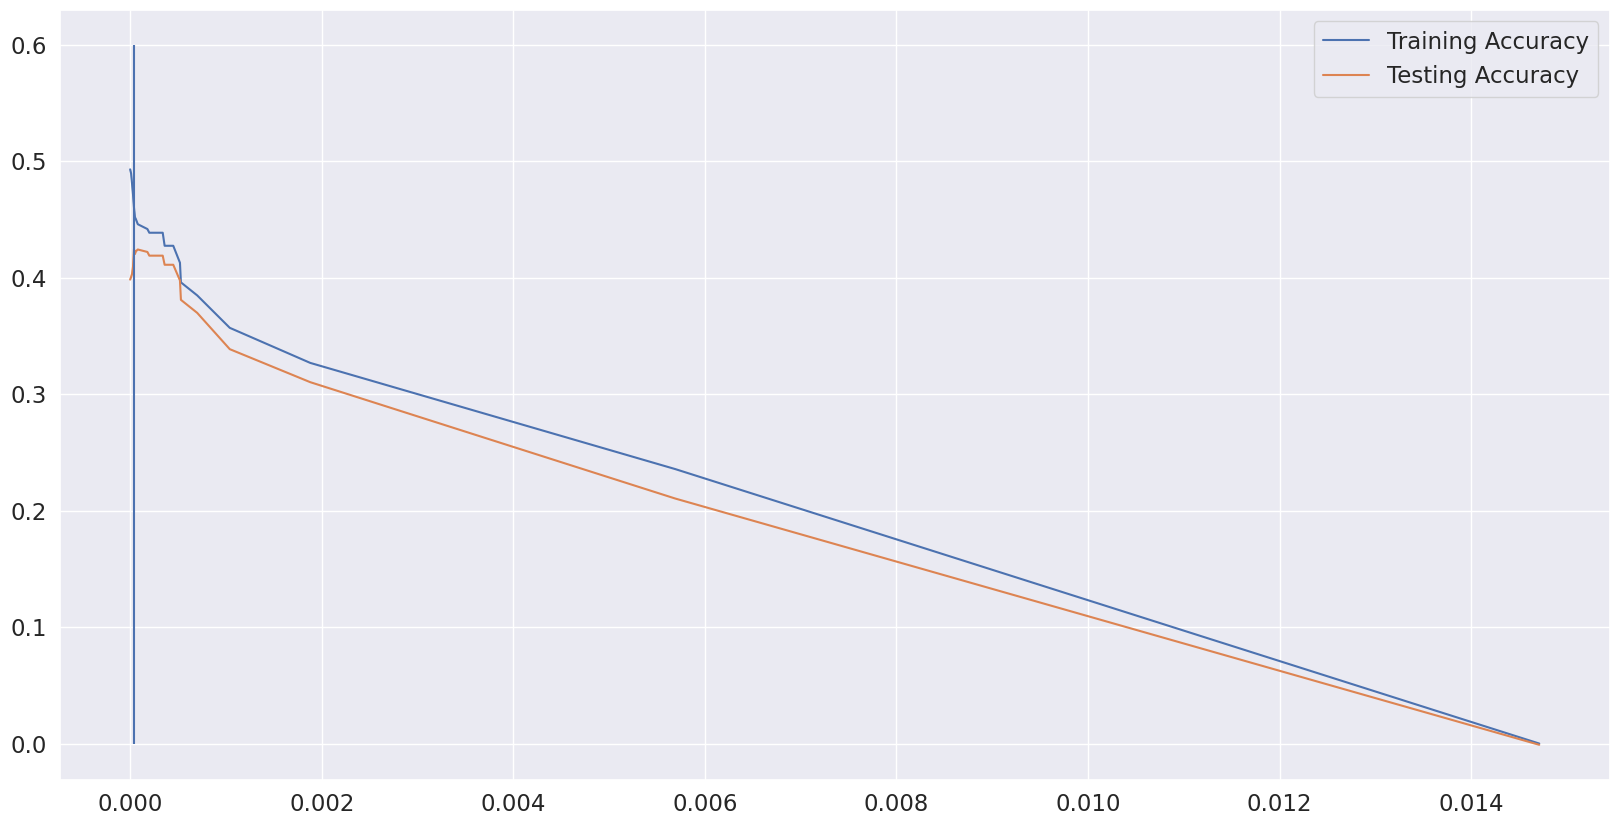

In [33]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x=alphas, y=train_score,label="Training Accuracy")
sns.lineplot(x=alphas, y=test_score,label="Testing Accuracy")
plt.vlines(alphas[np.argmax(test_score)],0,0.6)
fig.show()

In [34]:
#so now fit the decision tree with max_test_score
max_test_score_alpha = alphas[np.argmax(test_score)]
dtree = DecisionTreeRegressor(ccp_alpha = max_test_score_alpha,
                                  max_depth=8,random_state = 40)

dtree.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=4e-05, max_depth=8, random_state=40)

In [35]:
#updated test_score and training score 

print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))

0.4603150125815775
0.42467902483758413


In [32]:
#R-squared Value
print(f"The R-squared value : {dtree.score(X_test,y_test):.2%}")

The R-squared value : 42.47%
